## **Import Libraries and Dependencies**

In [46]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [47]:
df = pd.read_csv('/content/Cricket Dataset (1).csv')

## **Data Cleaning**

In [48]:
df.head()

,Unnamed: 0,batting_team,bowling_team,city,current_score,pp,balls_left,wickets_left,crr,Top_Order,Middle_Order,Lower_Order,Tail,Pressure,Aggression_Mode,last_five,Death_Overs,runs_x
0,39447,South Africa,India,Johannesburg,171,0,15,7,9.771429,0,1,0,0,0,1,61.0,1,219
1,6030,India,South Africa,Cape Town,66,0,71,9,8.081633,1,0,0,0,0,0,35.0,0,172
2,37472,West Indies,Sri Lanka,Pallekele,120,0,9,6,6.486486,0,0,1,0,1,1,47.0,1,129
3,32244,Australia,England,Melbourne,118,0,18,5,6.941176,0,0,1,0,1,0,38.0,1,147
4,52622,South Africa,Sri Lanka,Johannesburg,69,0,56,5,6.468750,0,0,1,0,1,0,29.0,0,113


In [49]:
df.isnull().sum()

Unnamed: 0         0
batting_team       0
bowling_team       0
city               0
current_score      0
pp                 0
balls_left         0
wickets_left       0
crr                0
Top_Order          0
Middle_Order       0
Lower_Order        0
Tail               0
Pressure           0
Aggression_Mode    0
last_five          0
Death_Overs        0
runs_x             0
dtype: int64

In [50]:
df['last_five'] = df['last_five'].astype(int)

In [51]:
df['crr'] = df['crr'].round(2)

In [52]:
df_encoded = pd.get_dummies(df, columns=['batting_team', 'bowling_team', 'city'])

# Verify the encoding
print(df_encoded.head())

   Unnamed: 0  current_score  pp  balls_left  wickets_left   crr  Top_Order  \
0       39447            171   0          15             7  9.77          0   
1        6030             66   0          71             9  8.08          1   
2       37472            120   0           9             6  6.49          0   
3       32244            118   0          18             5  6.94          0   
4       52622             69   0          56             5  6.47          0   

   Middle_Order  Lower_Order  Tail  ...  city_Pallekele  city_Perth  \
0             1            0     0  ...               0           0   
1             0            0     0  ...               0           0   
2             0            1     0  ...               1           0   
3             0            1     0  ...               0           0   
4             0            1     0  ...               0           0   

   city_Pune  city_Rajkot  city_Southampton  city_St Kitts  city_St Lucia  \
0          0         

In [53]:
df_encoded.head()

,Unnamed: 0,current_score,pp,balls_left,wickets_left,crr,Top_Order,Middle_Order,Lower_Order,Tail,...,city_Pallekele,city_Perth,city_Pune,city_Rajkot,city_Southampton,city_St Kitts,city_St Lucia,city_Sydney,city_Trinidad,city_Wellington
0,39447,171,0,15,7,9.77,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6030,66,0,71,9,8.08,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37472,120,0,9,6,6.49,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,32244,118,0,18,5,6.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,52622,69,0,56,5,6.47,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **Visualisation**

In [54]:
import plotly.express as px

In [55]:
df.columns

Index(['Unnamed: 0', 'batting_team', 'bowling_team', 'city', 'current_score',
       'pp', 'balls_left', 'wickets_left', 'crr', 'Top_Order', 'Middle_Order',
       'Lower_Order', 'Tail', 'Pressure', 'Aggression_Mode', 'last_five',
       'Death_Overs', 'runs_x'],
      dtype='object')

In [56]:
average_runs_under_pressure = df[df['Pressure'] == 1].groupby('batting_team')['runs_x'].mean().reset_index()

In [57]:

fig = px.bar(
    data_frame=average_runs_under_pressure,
    x='batting_team',
    y='runs_x',
    color='batting_team',  # Assigning different colors based on the Batting_team column
    template='plotly_dark',
    title='Average Runs Scored by Batting Team Under Pressure'
)

fig.update_layout(
    xaxis_title='Batting Team',
    yaxis_title='Average Runs'
)

fig.show()

In [58]:
death_overs_runs = df[df['Death_Overs'] == 1].groupby('batting_team')['runs_x'].mean().reset_index()

fig = px.bar(
    data_frame=death_overs_runs,
    x='batting_team',
    y='runs_x',
    color='batting_team',  # Assigning different colors based on the Batting_team column
    template='plotly_dark',
    title='Average Runs Scored by Batting Team In Death Overs'
)

fig.update_layout(
    xaxis_title='Batting Team',
    yaxis_title='Average Runs'
)

fig.show()

In [59]:
fig = px.histogram(df, x='crr', nbins=20, title='Current Run Rate Distribution')
fig.show()

In [60]:
fig = px.pie(df, names='wickets_left', title='Distribution of Wickets Left')
fig.show()

In [61]:
average_runs_pp = df.groupby('batting_team')['pp'].mean().reset_index()

fig = px.bar(
    data_frame=average_runs_pp,
    x='batting_team',
    y='pp',
    color='batting_team',
    template='plotly_dark',
    title='Average Runs Scored by Teams during Powerplay'
)

fig.update_layout(
    xaxis_title='Batting Team',
    yaxis_title='Average Runs'
)

fig.show()

In [62]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, title='Correlation Heatmap')
fig.show()

<ipython-input-62-398a3da21a7b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [63]:
team_counts = df['batting_team'].value_counts()
fig = px.pie(names=team_counts.index, values=team_counts.values, title='Distribution of Batting Teams')
fig.show()

In [64]:
fig = px.box(df, x='batting_team', y='runs_x', title='Distribution of Runs Scored by Batting Team')
fig.show()

In [65]:
average_crr_pp = df.groupby('batting_team')['crr'].mean().reset_index()
average_crr_pp = average_crr_pp.sort_values('crr', ascending=False).reset_index(drop=True)

# Plot the average CRR in PP for each batting team
fig = px.bar(average_crr_pp, x='batting_team', y='crr', title='Average CRR in Powerplay by Batting Team')
fig.show()

## **Valubale Insights**

1) Australia (Aus) and India (Ind) have scored the highest runs under pressure.

2) Australia (Aus), England (Eng), South Africa (SA), and India (Ind) have performed well in the death overs.

3) On average, the current run rate (CRR) falls between 6 to 9.
South Africa (SA) and Afghanistan (AFG) have scored the most runs in the powerplay compared to other teams.

4) Australia (Aus), South Africa (SA), and Sri Lanka (SL) score quickly in the powerplay, while Afghanistan (AFG), West Indies (WI), and Pakistan (PAK) have a slower scoring rate.

## **Creating Model**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df_encoded.drop('runs_x', axis=1)
y = df_encoded['runs_x']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
import xgboost as xgb

# Training the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Evaluating the XGBoost model
xgb_predictions = xgb_model.predict(X_test)
xgb_score = xgb_model.score(X_test, y_test)
print(xgb_score)

0.9771347441573086


In [69]:
from sklearn.linear_model import LinearRegression

# Training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluating the Linear Regression model
linear_predictions = linear_model.predict(X_test)
linear_score = linear_model.score(X_test, y_test)

In [70]:
print(linear_score)

0.7082562692284555


In [71]:
from sklearn.tree import DecisionTreeRegressor

# Training the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Evaluating the Decision Tree model
dt_predictions = dt_model.predict(X_test)
dt_score = dt_model.score(X_test, y_test)

In [72]:
print(dt_score)

0.9797796972256891


In [73]:
print('XGBoost Score: ',xgb_score)
print('Linear Regression Score: ',linear_score)
print('Decision Tree Score: ',dt_score)

XGBoost Score:  0.9771347441573086
Linear Regression Score:  0.7082562692284555
Decision Tree Score:  0.9797796972256891


## **Decision Tree Model Classification**

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate predictions for the Decision Tree model
dt_predictions = dt_model.predict(X_test)

# Calculate evaluation metrics
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

# Print the evaluation metrics for the Decision Tree model
print("Decision Tree Model Evaluation:")
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("Root Mean Squared Error (RMSE):", dt_rmse)
print("R-squared Score (R2):", dt_r2)


Decision Tree Model Evaluation:
Mean Absolute Error (MAE): 0.5904828065300451
Mean Squared Error (MSE): 21.003820771101076
Root Mean Squared Error (RMSE): 4.582992556299986
R-squared Score (R2): 0.9797796972256891


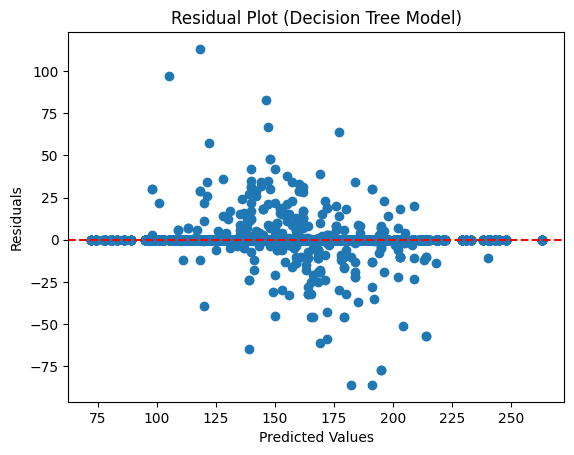

In [75]:
import matplotlib.pyplot as plt

residuals = y_test - dt_predictions

# Create a residual plot
plt.scatter(dt_predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Decision Tree Model)')
plt.show()


## **XGBoost Model Classification**

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Evaluating the XGBoost model
xgb_predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics for XGBoost model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Print the evaluation metrics for the XGBoost model
print("XGBoost Model Evaluation:")
print("Mean Absolute Error (MAE):", xgb_mae)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared Score (R2):", xgb_r2)


XGBoost Model Evaluation:
Mean Absolute Error (MAE): 3.5497046706162214
Mean Squared Error (MSE): 23.751263320122458
Root Mean Squared Error (RMSE): 4.873526784590648
R-squared Score (R2): 0.9771347441573086


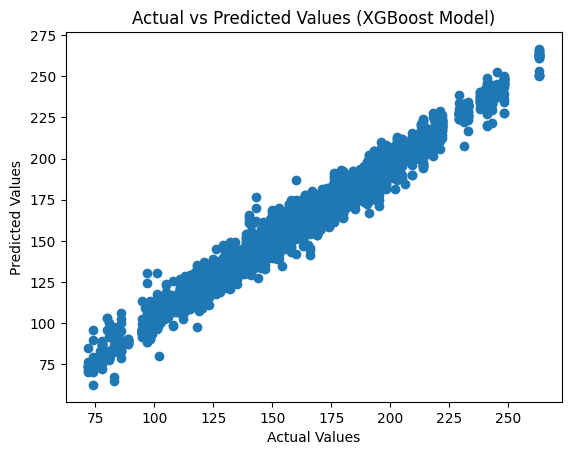

In [77]:
import matplotlib.pyplot as plt

# Create scatter plot for XGBoost model
plt.scatter(y_test, xgb_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (XGBoost Model)')
plt.show()



## **Linear Regression Model Classification**

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluating the Linear Regression model
linear_predictions = linear_model.predict(X_test)

# Calculate evaluation metrics for Linear Regression model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

# Print the evaluation metrics for the Linear Regression model
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error (MAE):", linear_mae)
print("Mean Squared Error (MSE):", linear_mse)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("R-squared Score (R2):", linear_r2)


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 12.849211011321783
Mean Squared Error (MSE): 303.0485300152345
Root Mean Squared Error (RMSE): 17.40828911798154
R-squared Score (R2): 0.7082562692284555


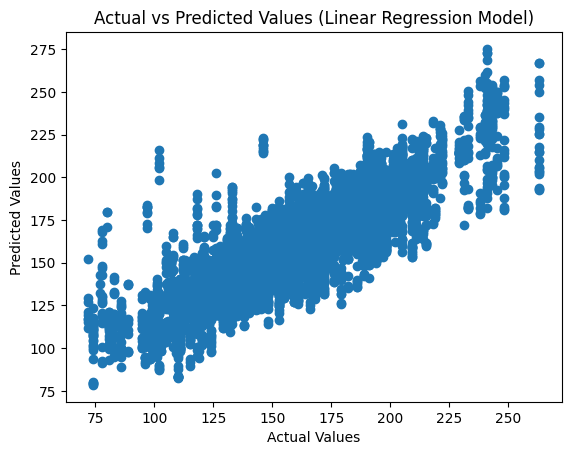

In [79]:
# Create scatter plot for Linear Regression model
plt.scatter(y_test, linear_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression Model)')
plt.show()

## **Final Score**

In [80]:
print('XGBoost Score: ',xgb_score)
print('Linear Regression Score: ',linear_score)
print('Decision Tree Score: ',dt_score)

XGBoost Score:  0.9771347441573086
Linear Regression Score:  0.7082562692284555
Decision Tree Score:  0.9797796972256891


## **Conclusion**

**Decision Tree Model gives the higest accuracy of 97.97%**